In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
f = open('ingredients-usda.ttl', 'r')
text = f.readlines()

In [3]:
foods = []
ingredients = []
labels = []

for line in text:
    line = line.strip()
    if line.startswith('<http://idea.rpi.edu/heals/kb/'):
        line = line.replace('<', '')
        line = line.replace('> a http://idea.rpi.edu/heals/kb/usda> ;', '')
        foods.append(line)
    elif line.startswith('rdfs:label'):
        line = line.replace('rdfs:label ','')
        line = line.replace('"','')
        line = line.replace(' ;','')
        labels.append(line)
    elif line.startswith('ns1:contains') and line.endswith(','):
        lst = []
        line = line.replace('ns1:contains <','')
        line = line.replace('>,','')
        lst.append(line)
    elif line.startswith('<http://www.w3id.org/foodkg/usda') and line.endswith(','):
        line = line.replace('<','')
        line = line.replace('>,','')
        lst.append(line)
    elif line.startswith('<http://www.w3id.org/foodkg/usda') and line.endswith('.'):
        line = line.replace('<','')
        line = line.replace('> .','')
        lst.append(line)
        ingredients.append(lst)

In [4]:
df = pd.DataFrame()
df['foods'] = foods
df['labels'] = labels
df['ingredients'] = ingredients
df.head()

,foods,labels,ingredients
0,http://idea.rpi.edu/heals/kb/usda#01001,"BUTTER,WITH SALT",[http://www.w3id.org/foodkg/usda#GmWt_1-X_wFUQ...
1,http://idea.rpi.edu/heals/kb/usda#01002,"BUTTER,WHIPPED,WITH SALT",[http://www.w3id.org/foodkg/usda#GmWt_1-qmUAdh...
2,http://idea.rpi.edu/heals/kb/usda#01003,"BUTTER OIL,ANHYDROUS",[http://www.w3id.org/foodkg/usda#GmWt_1-JG6dQ5...
3,http://idea.rpi.edu/heals/kb/usda#01004,"CHEESE,BLUE",[http://www.w3id.org/foodkg/usda#GmWt_1-3aSX_T...
4,http://idea.rpi.edu/heals/kb/usda#01005,"CHEESE,BRICK",[http://www.w3id.org/foodkg/usda#GmWt_1-hPYzgC...


In [5]:
ingredients = []
ingredients_cat = []
values = []
units = []

for line in text:
    line = line.strip()
    if line.startswith('<http://www.w3id.org/foodkg/usda') and line.endswith(';'):
        ingredient = re.findall(r'(?<=\<).+?(?=\>)', line)
        ingredient_cat = re.findall(r'(?<=\#).+?(?=\>)', line)
        ingredients.append(ingredient[0])
        ingredients_cat.append(ingredient_cat[1])   
    elif line.startswith('ns2:hasValue'):
        value = re.findall(r'(?<=ns2:hasValue ).+?(?=xsd:)', line)
        if len(value) == 0:
            value = line.replace('ns2:hasValue ', '')
            value = value.replace(' .', '')
        elif len(value) != 0:
            value = value[0]
            value = value.replace('"', '')
            value = value.replace('^^', '')
        values.append(value)

In [6]:
df_2 = pd.DataFrame()
df_2['ingredients'] = ingredients
df_2['ingredients_cat'] = ingredients_cat
df_2['values'] = values
df_2.head()

,ingredients,ingredients_cat,values
0,http://www.w3id.org/foodkg/usda#GmWt_1-154Ekp9...,GmWt_1,1071.0
1,http://www.w3id.org/foodkg/usda#GmWt_1-28o5qu1...,GmWt_1,314.0
2,http://www.w3id.org/foodkg/usda#GmWt_1-2QLGQGc...,GmWt_1,846.0
3,http://www.w3id.org/foodkg/usda#GmWt_1-3ggFRiF...,GmWt_1,370.0
4,http://www.w3id.org/foodkg/usda#GmWt_1-4ptWAbW...,GmWt_1,461.0


In [7]:
df_2['ingredients_cat'].unique()

array(['GmWt_1', 'GmWt_2', 'GmWt_Desc1', 'GmWt_Desc2', 'Refuse_Pct',
       'alpha_carot', 'ash', 'beta_carot', 'beta_crypt', 'calcium',
       'carbohydrate', 'cholestrl', 'choline', 'copper', 'description',
       'energy', 'fat_mono', 'fat_poly', 'fat_sat', 'fiber', 'folate',
       'folate_DFE', 'folic_acid', 'food_folate', 'iron', 'lipid',
       'lut_zea', 'lycopene', 'magnesium', 'manganese', 'niacin',
       'panto_acid', 'phosphorus', 'potassium', 'protein', 'retinol',
       'riboflavin', 'selenium', 'sodium', 'sugar', 'thiamin', 'vit_A',
       'vit_A_RAE', 'vit_B12', 'vit_D', 'vit_D_IU', 'vit_K', 'vitamin_B6',
       'vitamin_C', 'vitamin_E', 'water', 'zinc'], dtype=object)

In [8]:
ing2cat = {}
ing2val = {}
for i, row in df_2.iterrows():
    ing = row[0]
    cat = row[1]
    val = row[2]
    ing2cat[ing] = cat
    ing2val[ing] = val    

In [9]:
def scoreEnergy(energy):
  if energy <= 335:
    return 0
  elif energy > 3350:
    return 10
  elif energy > 3015:
    return 9
  elif energy > 2680:
    return 8
  elif energy > 2345:
    return 7
  elif energy > 2010:
    return 6
  elif energy > 1675:
    return 5
  elif energy > 1340:
    return 4
  elif energy > 1005:
    return 3
  elif energy > 670:
    return 2
  elif energy > 335:
    return 1

def scoreSugar(sugar):
  if sugar <= 4.5:
    return 0
  elif sugar > 45:
    return 10
  elif sugar > 40:
    return 9
  elif sugar > 36:
    return 8
  elif sugar > 31:
    return 7
  elif sugar > 27:
    return 6
  elif sugar > 22.5:
    return 5
  elif sugar > 18:
    return 4
  elif sugar > 13.5:
    return 3
  elif sugar > 9:
    return 2
  elif sugar > 4.5:
    return 1

def scoreSaturatedFattyAcid(saturatedFattyAcids):
  if saturatedFattyAcids <= 1:
    return 0
  elif saturatedFattyAcids > 10:
    return 10
  elif saturatedFattyAcids > 9:
    return 9
  elif saturatedFattyAcids > 8:
    return 8
  elif saturatedFattyAcids > 7:
    return 7
  elif saturatedFattyAcids > 6:
    return 6
  elif saturatedFattyAcids > 5:
    return 5
  elif saturatedFattyAcids > 4:
    return 4
  elif saturatedFattyAcids > 3:
    return 3
  elif saturatedFattyAcids > 2:
    return 2
  elif saturatedFattyAcids > 1:
    return 1

def scoreSodium(sodium):
  if sodium <= 90:
    return 0
  elif sodium > 900:
    return 10
  elif sodium > 810:
    return 9
  elif sodium > 720:
    return 8
  elif sodium > 630:
    return 7
  elif sodium > 540:
    return 6
  elif sodium > 450:
    return 5
  elif sodium > 360:
    return 4
  elif sodium > 270:
    return 3
  elif sodium > 180:
    return 2
  elif sodium > 90:
    return 1

def scoreFiber(fibers):
  if fibers <= 0.9:
    return 0
  elif fibers > 4.7:
    return -5
  elif fibers > 3.7:
    return -4
  elif fibers > 2.8:
    return -3
  elif fibers > 1.9:
    return -2
  elif fibers > 0.9:
    return -1

def scoreProtein(proteins):
  if proteins <= 1.6:
    return 0
  elif proteins > 8:
    return -5
  elif proteins > 6.4:
    return -4
  elif proteins > 4.8:
    return -3
  elif proteins > 3.2:
    return -2
  elif proteins > 1.6:
    return -1

def nutriScoreFoods(nutri_score):
  if nutri_score >= -15 and nutri_score <= -1:
    return 'A'
  elif nutri_score >= 0 and nutri_score <= 2:
    return 'B'
  elif nutri_score >= 3 and nutri_score <= 10:
    return 'C'
  elif nutri_score >= 11 and nutri_score <= 18:
    return 'D'
  elif nutri_score >= 19 and nutri_score <= 40:
    return 'E'

def nutriScoreBeverages(nutri_score):
  if nutri_score <= 1:
    return 'B'
  elif nutri_score >= 2 and nutri_score <= 5:
    return 'C'
  elif nutri_score >= 6 and nutri_score <= 9:
    return 'D'
  elif nutri_score >= 10 and nutri_score <= 40:
    return 'E'

In [10]:
def get_nutri_value(lst):
    cat = []
    val = []
    for ingredient in lst:
        if ingredient in ing2cat:
            cat.append(ing2cat[ingredient])
        elif ingredient not in ing2cat:
            cat.append(np.nan)
        if ingredient in ing2val:
            val.append(ing2val[ingredient])
        elif ingredient not in ing2val:
            val.appennd(np.nan)
    df = pd.DataFrame()
    df['ing'] = lst
    df['cat'] = cat
    df['val'] = val
    
    total = 0
    if len(df[(df.cat == 'energy')]) != 0:
        total += scoreEnergy(float(df[(df.cat == 'energy')]['val'].iloc[0]))
    if len(df[(df.cat == 'sugar')]) != 0:
        total += scoreSugar(float(df[(df.cat == 'sugar')]['val'].iloc[0]))
    if len(df[(df.cat == 'fat_sat')]) != 0:
        total += scoreSaturatedFattyAcid(float(df[(df.cat == 'fat_sat')]['val'].iloc[0]))
    if len(df[(df.cat == 'sodium')]) != 0:
        total += scoreSodium(float(df[(df.cat == 'sodium')]['val'].iloc[0]))
    if len(df[(df.cat == 'fiber')]) != 0:
        total += scoreFiber(float(df[(df.cat == 'fiber')]['val'].iloc[0]))
    if len(df[(df.cat == 'protein')]) != 0:
        total += scoreProtein(float(df[(df.cat == 'protein')]['val'].iloc[0]))
    return total

In [11]:
nutri_values = []
for i, row in df.iterrows():
    nutri_values.append(get_nutri_value(df['ingredients'].iloc[i]))
df['nutri_values'] = nutri_values

In [13]:
nutri_scores = []
for i, row in df.iterrows():
    nutri_scores.append(nutriScoreFoods(df['nutri_values'].iloc[i]))
df['nutri_scores'] = nutri_scores

In [14]:
df.head()

,foods,labels,ingredients,nutri_values,nutri_scores
0,http://idea.rpi.edu/heals/kb/usda#01001,"BUTTER,WITH SALT",[http://www.w3id.org/foodkg/usda#GmWt_1-X_wFUQ...,19,E
1,http://idea.rpi.edu/heals/kb/usda#01002,"BUTTER,WHIPPED,WITH SALT",[http://www.w3id.org/foodkg/usda#GmWt_1-qmUAdh...,19,E
2,http://idea.rpi.edu/heals/kb/usda#01003,"BUTTER OIL,ANHYDROUS",[http://www.w3id.org/foodkg/usda#GmWt_1-JG6dQ5...,12,D
3,http://idea.rpi.edu/heals/kb/usda#01004,"CHEESE,BLUE",[http://www.w3id.org/foodkg/usda#GmWt_1-3aSX_T...,16,D
4,http://idea.rpi.edu/heals/kb/usda#01005,"CHEESE,BRICK",[http://www.w3id.org/foodkg/usda#GmWt_1-hPYzgC...,12,D


In [15]:
df.to_csv('usda_nutriscores.csv')

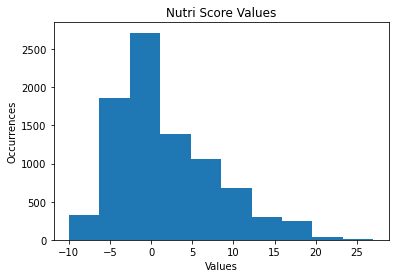

In [18]:
plt.hist(list(df['nutri_values']))
plt.title('Nutri Score Values')
plt.xlabel('Values')
plt.ylabel('Occurrences')
plt.show()

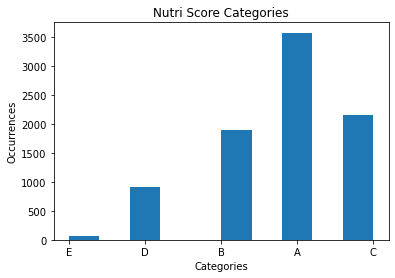

In [20]:
plt.hist(list(df['nutri_scores']))
plt.title('Nutri Score Categories')
plt.xlabel('Categories')
plt.ylabel('Occurrences')
plt.show()